In [1]:
from pathlib import Path
import logging
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch import Tensor
import numpy as np
from scipy.optimize import fmin_l_bfgs_b
from datetime import datetime


import prelude
from deepdream.dream import DreamMaker
from deepdream.models.base import BaseDreamModel
from deepdream.models import VGG16
from deepdream.img2tensor import ImageToTensorTransformer

ASSETS_DIR = Path('../assets')
TARGETS_DIR = ASSETS_DIR.joinpath('targets')
STYLES_DIR = ASSETS_DIR.joinpath('styles')
OUT_DIR = Path('../out/')

logging.basicConfig(
    format='%(asctime)s | %(levelname)s: %(message)s',
    level=logging.INFO,
)

## Load Images

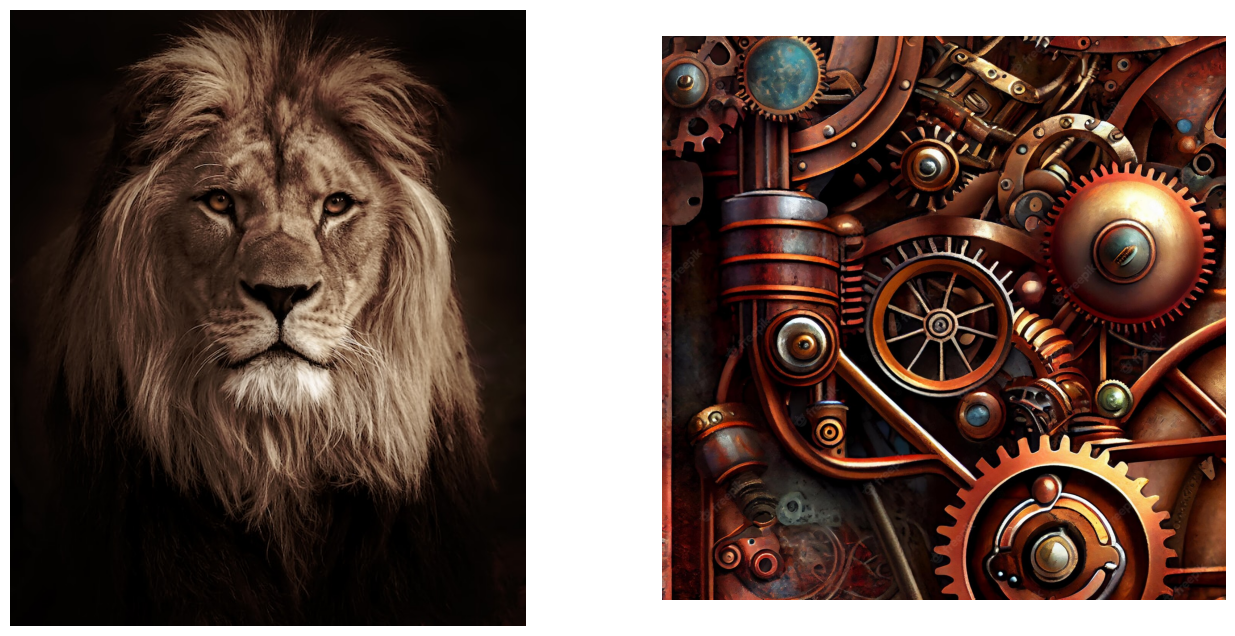

In [2]:
target_img = Image.open(TARGETS_DIR.joinpath('lion2').with_suffix('.jpg'))
style_img = Image.open(STYLES_DIR.joinpath('gears').with_suffix('.jpg'))

axs: list[plt.Axes]
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(target_img)
axs[1].imshow(style_img)
for ax in axs:
    ax.set_axis_off()
plt.show()

In [3]:
dream_model = VGG16().watch_layers({
    'relu1_2',
    'relu2_2',
    'relu3_3',
    'relu4_2', 'relu4_3',
    'relu5_3'
})

dream_maker = DreamMaker(model=dream_model)

In [4]:
def save_dream(img: Image.Image, sub_dir):
    
    filename = datetime.now().strftime('%F %T')
    filepath = OUT_DIR.joinpath(sub_dir).joinpath(filename).with_suffix('.jpg')
    with open(filepath, 'w') as f:
        img.save(f)

In [5]:
n_epochs = 5
for epoch in range(n_epochs):
    
    dream_img, loss = dream_maker.make_dream(
        target_img=target_img,
        style_img=style_img,
        return_loss=True
    )
    
    logging.info(f'Loss: {loss}')
    
    save_dream(dream_img, sub_dir='lion-x-cyber-punk')

2023-06-22 03:23:01,370 | INFO: Loss: 465.61761474609375
2023-06-22 03:25:36,021 | INFO: Loss: 182.9209442138672
2023-06-22 03:28:10,304 | INFO: Loss: 120.6324462890625
2023-06-22 03:30:45,894 | INFO: Loss: 96.22435760498047
2023-06-22 03:33:21,342 | INFO: Loss: 82.47473907470703


In [ ]:
def make_dream(
        target_img: Image.Image,
        style_img: Image.Image,
        dream_maker: DreamMaker,
        n_epochs: int = 5
    ) -> Image.Image:
    
    for epoch in range(n_epochs):
    
        dream_img, loss = dream_maker.make_dream(
            target_img=target_img,
            style_img=style_img,
            return_loss=True
        )
        
    return dream_img